In [21]:
from magic_class import Magic as mg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Aufruf unseres magic-Packages
a = mg()
# Aufruf unserer Datei "housing.csv"
housing_1 = a.load_csv("housing.csv")

# Hinzufügung von weiteren Attributen
#housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
#housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
#housing["population_per_household"]=housing["population"]/housing["households"]

# Kategorisierung der Spalte "ocean_proximity"
housing = a.categorize("ocean_proximity")
# Entfernung aller Zeilen mit NaN
housing = a.cleanup(housing) # alle Zeile mit NaN werden gelöscht
# Festlegung unseres Targets
y = pd.DataFrame(housing["median_house_value"]) # Unser Target
# Festlegung unserer Input-Daten
X = housing.drop("median_house_value", axis=1) # Trainingsdaten ohne Target y "median_house_value"
# Split in Train und Test Daten
X_train, X_test, y_train, y_test = a.Train_Test(X, y)
# Skalierung der Daten, außer die Kategorisierung
X_train_scaled, X_test_scaled = a.scale_data(X_train.iloc[:, :8], X_test.iloc[:, :8]) #  [;, :11]
# Berechnung diverser Modellklassen
result = a.apply_reg_model(X_train_scaled, X_test_scaled, y_train, y_test)
# Ausgabe des Ergebnisses
result
#housing.head()

# Ohne Features
#########{'linear_regression': {'y_pred': array([[197058.03752153],
        # [157508.79088918],
        # [202099.26270387],
        # ...,
        # [131098.67538845],
        # [155468.78077784],
        # [166363.59962368]]),
 # 'score': 0.6400865688993737,
#  'rmse': 70156.12045736385},
# 'kneighbor_regression': {'y_pred': array([[127600.],
  #       [161400.],
 #        [197220.],
   #      ...,
    #     [ 92500.],
     #    [130380.],
      #   [125580.]]), 'score': 0.7142268615358505, 'rmse': 62513.9930918972}}
    

# Mit Features
# {'linear_regression': {'y_pred': array([[209404.74561495],
#         [154878.60008167],
#         [197987.31701465],
#         ...,
#         [125426.89981554],
#         [149338.02190876],
#         [156510.79825024]]),
#  'score': 0.6444552331796864,
#  'rmse': 69729.0396018855},
# 'kneighbor_regression': {'y_pred': array([[150300.],
#         [161400.],
#         [189380.],
#         ...,
#         [ 88080.],
#         [127140.],
#         [133620.]]), 'score': 0.7029718944558996, 'rmse': 63733.139275051595}}


{'linear_regression': {'y_pred': array([[197058.03752153],
         [157508.79088918],
         [202099.26270387],
         ...,
         [131098.67538845],
         [155468.78077784],
         [166363.59962368]]),
  'score': 0.6400865688993737,
  'rmse': 70156.12045736385},
 'kneighbor_regression': {'y_pred': array([[127600.],
         [161400.],
         [197220.],
         ...,
         [ 92500.],
         [130380.],
         [125580.]]), 'score': 0.7142268615358505, 'rmse': 62513.9930918972}}

In [18]:
#sns.pairplot(housing_1, hue='ocean_proximity', size=5);

<IPython.core.display.Javascript object>


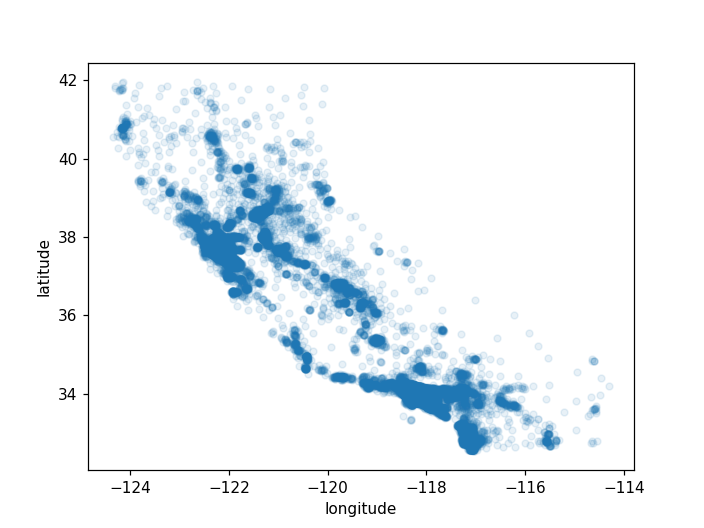

In [19]:
%matplotlib notebook

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<IPython.core.display.Javascript object>


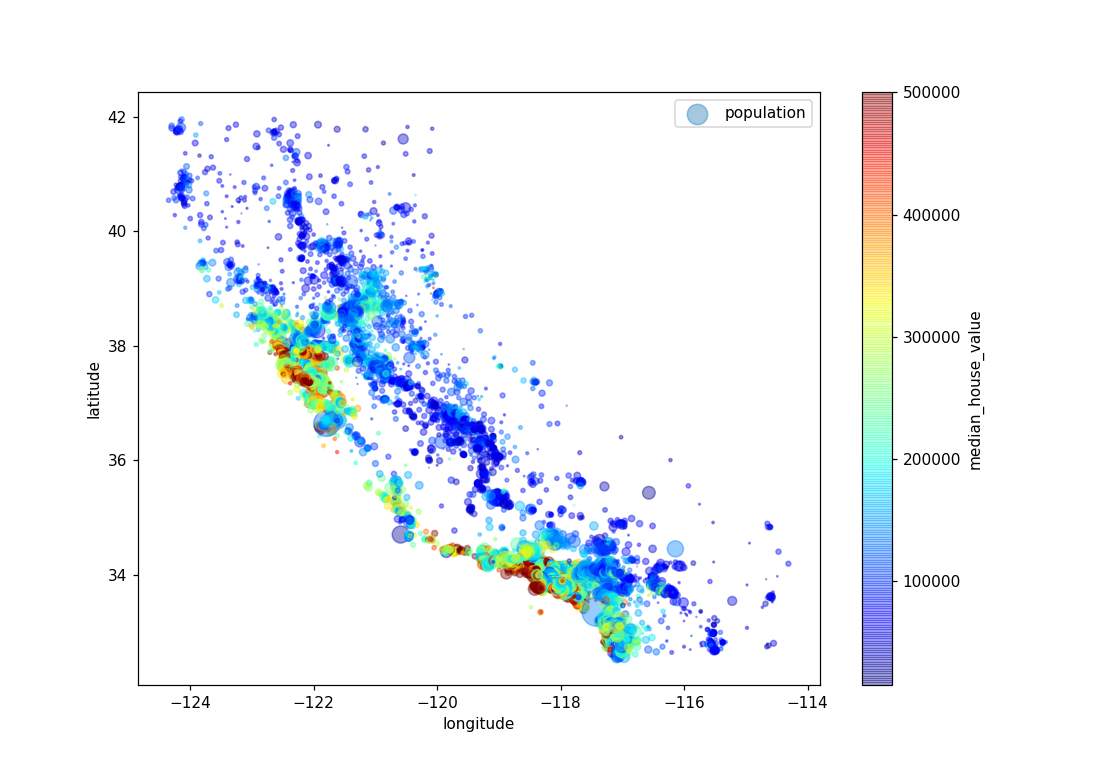

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=housing["population"]/100, label="population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)